(3 балла) Сделать EDA (Exploratory Data Analysis, разведочный анализ данных). Обязательно посмотреть на
сбалансированность классов;
корреляции признаков;
статистику по отдельным признакам (минимум два графика).


(5 балла) Обучить и оценить два классификатора (KNN, Logistic Regression или Decision Tree):
разделить данные на выборки;
обучить модель с параметрами по умолчанию, оценить качество;
подобрать лучшую комбинацию параметров через grid search, оценить качество.



(2 балла) Провести анализ ошибок. Попробовать объяснить, почему получилось именно такое качетство.


(+2 балла) Предложить способ улучшить качество и реализовать его (здесь можно сделать полиномиальную регрессию, нормировать или как-то иначе преобразовать признаки, попробовать выкинуть лишние или добавить новые)

###Установка датасета

In [1]:
!curl -L -o mobile-price-classification.zip https://www.kaggle.com/api/v1/datasets/download/iabhishekofficial/mobile-price-classification
!unzip mobile-price-classification.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 72340  100 72340    0     0   131k      0 --:--:-- --:--:-- --:--:--  131k
Archive:  mobile-price-classification.zip
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [2]:
import pandas as pd

data = pd.read_csv('train.csv')

In [3]:
data.head(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,...,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,...,1137,1224,513,19,10,12,1,0,0,0


###EDA

####Сбалансированность классов

<ipython-input-4-3abe05756776>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='price_range', data=data, palette='viridis')


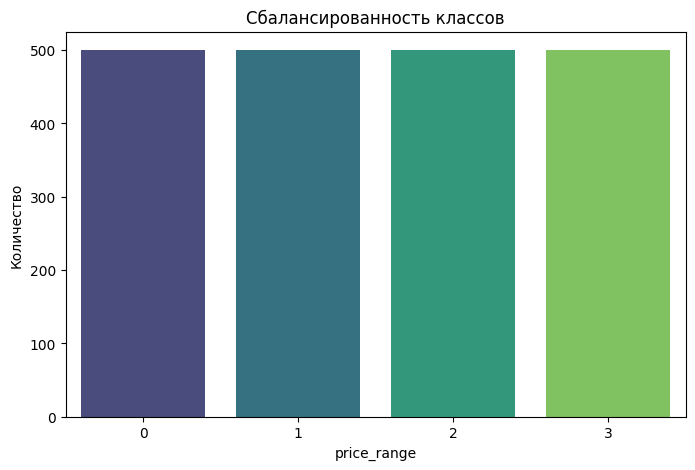

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.countplot(x='price_range', data=data, palette='viridis')
plt.title('Сбалансированность классов')
plt.ylabel('Количество')
plt.show()

####Корреляция признаков

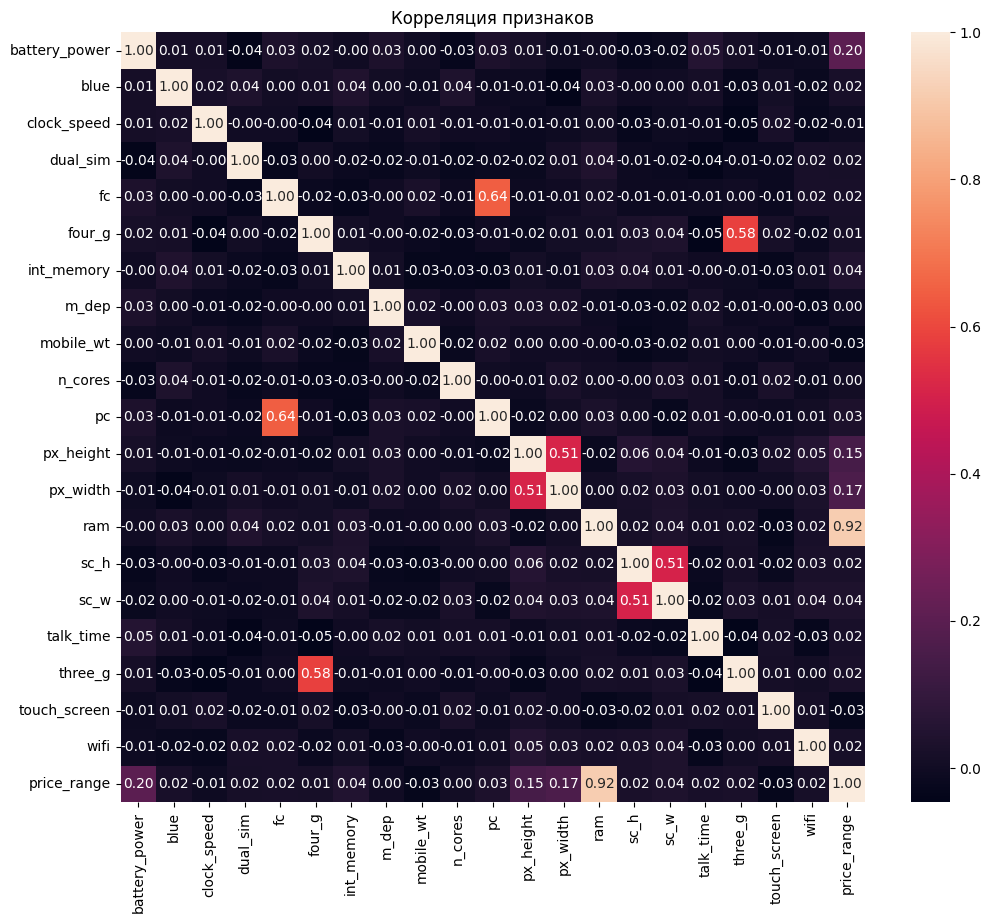

In [5]:
plt.figure(figsize=(12, 10))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f')
plt.title('Корреляция признаков')
plt.show()

####Статистика по 3 отдельным признакам

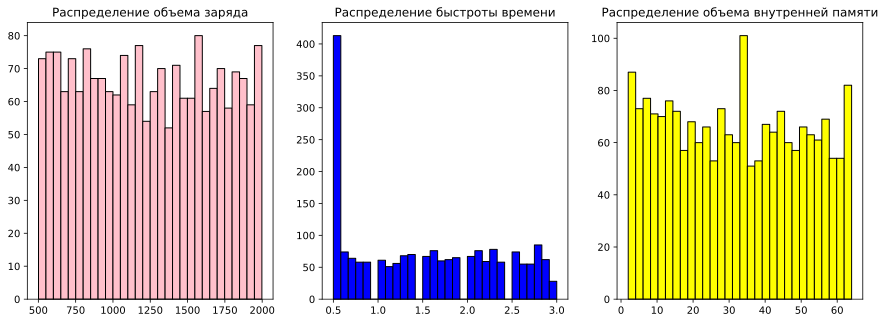

In [6]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5
%config InlineBackend.figure_format = 'svg'
import seaborn as sns

fig, axs = plt.subplots(1, 3, figsize=(15, 5), dpi=300)
axs[0].set_title("Распределение объема заряда")
axs[0].hist(data['battery_power'], bins = 30, color = 'pink', edgecolor = 'black')

axs[1].set_title("Распределение быстроты времени")
axs[1].hist(data['clock_speed'], bins = 30, color = 'blue', edgecolor = 'black')


axs[2].set_title("Распределение объема внутренней памяти")
axs[2].hist(data['int_memory'], bins = 30, color = 'yellow', edgecolor = 'black')


plt.show()

###KNN и LogReg

####KNN

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [8]:
from sklearn.model_selection import train_test_split

X = data.drop('price_range', axis=1)
y = data['price_range']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # поделила выборку на train и test с фиксированной рандомностью

In [9]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

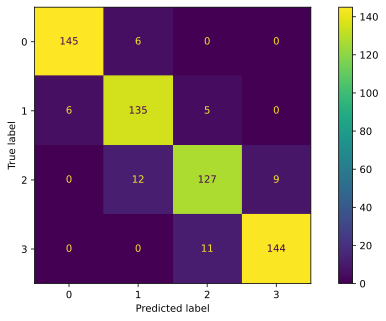

In [10]:
# Предсказание на тестовой выборке
y_hat = knn.predict(X_test)
matrix = confusion_matrix(y_test, y_hat)
disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=knn.classes_)
disp.plot()
plt.show()

In [11]:
print(classification_report(y_test, y_hat))
print(f'Accuracy: {accuracy_score(y_test, y_hat)}')

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       151
           1       0.88      0.92      0.90       146
           2       0.89      0.86      0.87       148
           3       0.94      0.93      0.94       155

    accuracy                           0.92       600
   macro avg       0.92      0.92      0.92       600
weighted avg       0.92      0.92      0.92       600

Accuracy: 0.9183333333333333


Получилось очень хорошие показатели accuracy. По графику видно, что лучше всего предсказывается 0 и 3 классы. Хуже всего 2 класс.

####LogReg

In [12]:
from sklearn.linear_model import LogisticRegression

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.635
              precision    recall  f1-score   support

           0       0.80      0.75      0.78       151
           1       0.52      0.51      0.51       146
           2       0.51      0.53      0.52       148
           3       0.71      0.74      0.72       155

    accuracy                           0.64       600
   macro avg       0.64      0.63      0.63       600
weighted avg       0.64      0.64      0.64       600



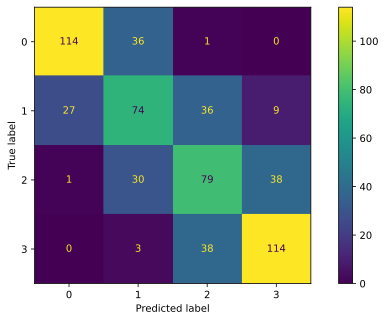

In [13]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

y_pred_log = log_reg.predict(X_test)


print(f'Accuracy: {accuracy_score(y_test, y_pred_log)}')
print(classification_report(y_test, y_pred_log))

matrix = confusion_matrix(y_test, y_pred_log)
disp = ConfusionMatrixDisplay(confusion_matrix=matrix)
disp.plot()

Accuracy получается хуже, но тендеция распределения между 4-мя классами остается такой же, как была в KNN. При этом результаты всё таки сильно хуже (

####Grid Search

In [14]:
from sklearn.model_selection import GridSearchCV

In [15]:
import warnings

In [16]:
%matplotlib inline
warnings.filterwarnings('ignore')

In [17]:
X = data.drop('price_range', axis=1)
y = data['price_range']

# Разделяем данные на обучающую и тестовую выборки (не опять, а снова, извините)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


#####Grid Search, который не помог

In [27]:
parameters = {
    'penalty': ['l1', 'l2', None],  # тип регуляризация
    'C':[1, 10],  # обратная сила регуляризации, ака чем меньше значение, тем больше штрафуем
    'fit_intercept': [True, False], # со смещением или без
    'solver': ['saga']
}


logreg_g = LogisticRegression()
clf = GridSearchCV(logreg_g, parameters, cv=5, verbose=1)
clf.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 10], 'fit_intercept': [True, False],
                         'penalty': ['l1', 'l2', None], 'solver': ['saga']},
             verbose=1)

In [28]:
logreg_g = clf.best_estimator_
pred = logreg_g.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.81      0.77      0.79       151
           1       0.51      0.47      0.49       146
           2       0.51      0.50      0.51       148
           3       0.68      0.78      0.73       155

    accuracy                           0.64       600
   macro avg       0.63      0.63      0.63       600
weighted avg       0.63      0.64      0.63       600



In [29]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, pred))

Logistic Regression Accuracy: 0.635


#####Grid Search, который помог
в параметр 'solver' были добавлены 'liblinear' (работает только с l1 регуляризацией), 'newton-cg' (работает только с l2 регуляризацией)

In [23]:
parameters = {
    'penalty': ['l1', 'l2', None],  # тип регуляризация
    'C':[1, 10],  # обратная сила регуляризации, ака чем меньше значение, тем больше штрафуем
    'fit_intercept': [True, False], # со смещением или без
    'solver': ['liblinear', 'newton-cg', 'saga']
}


logreg_g = LogisticRegression()
clf = GridSearchCV(logreg_g, parameters, cv=5, verbose=1)
clf.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 10], 'fit_intercept': [True, False],
                         'penalty': ['l1', 'l2', None],
                         'solver': ['liblinear', 'newton-cg', 'saga']},
             verbose=1)

In [24]:
logreg_g = clf.best_estimator_
pred = logreg_g.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97       151
           1       0.91      0.98      0.94       146
           2       0.97      0.93      0.95       148
           3       0.97      0.99      0.98       155

    accuracy                           0.96       600
   macro avg       0.96      0.96      0.96       600
weighted avg       0.96      0.96      0.96       600



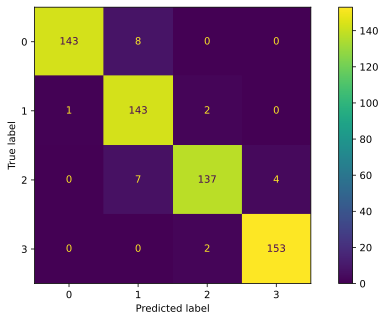

In [25]:
matrix = confusion_matrix(y_test, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=matrix)
disp.plot()

In [26]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, pred))

Logistic Regression Accuracy: 0.96


При такой LogisticRegression(C=10, solver='newton-cg') удалось добиться accuracy 0.96. Кажется, что уже ОЧЕНЬ хороший результат (выше никак у меня не получился).
Видим, что хуже всего предсказывается 2 класс (чаще всего он путается с 1 или 3 классами)


И, вообще, 2 класс предсказывается хуже всего вне зависимости от того, пользуемся ли мы grid search или нет, KNN или LogReg. Возможно, есть какой-то шумовой признак, который влияет на то, что этот класс путается с 1 и 3.

Добавишьсь высоких результатов accuracy (-> очень редкие ошибки) можно сделать вывод, что нет большого количества лишних параметров. Иначе бы не получилось достичь таких результатов.





*Дальше я попыталась сделать "красиво", как нас учили на майноре. Тут есть модель с 3 линейными слоями, была использована кросс-энтропия (так как у нас больше 1 класса), оптимизатор Adam, градиентный спуск, обратное распространение ошибки, обучение на 1000 эпохах. Спойлер: получить accuracy выше 0.93 не получилось. Но, возможно, можно было бы поэксперементировать еще и что-нибудь получилось бы (например, другой оптимизатор, другой learning rate или другое количество слоев в модели).*

###Эксперименты

*если что у меня есть всякие свои тетрадки с майнор-скими тетрадками, в которых я по такому же алгоритму делаю (если возникнут вопросы в самостоятельности написания фигни ниже)

In [30]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler

In [142]:
# да, я уже загружала, но на всякий случай еще раз, а то мало ли.
data = pd.read_csv('train.csv')
X = data.drop('price_range', axis=1).values
y = data['price_range'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Нормализация данных
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [143]:
class NN(nn.Module):
    def __init__(self, input_size, output_size):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 4)  # 4 т.к на выхоже должно получиться 4 класса
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        return x

In [144]:
input_size = X_train.shape[1]  # Количество признаков
output_size = len(set(y))       # Количество классов (выходные метки)

# Инициализация модели
model = NN(input_size, output_size)

# Определение функции потерь и оптимизатора
criterion = nn.CrossEntropyLoss()  # Кросс-энтропия для многоклассовой классификации
optimizer = optim.Adam(model.parameters(), lr=0.05)    # оптимизатор adan и learning rate=0.05 (поыткалась в разные, вроде с таким наилучшие резы)

# Обучение модели
num_epochs = 1000  # Количество эпох (мне было не очень жалко время, тем более оно не особо долго пробегается)

for epoch in range(num_epochs):
    model.train()
    inputs = torch.FloatTensor(X_train)
    labels = torch.LongTensor(y_train)

    # Обнуление градиентов
    optimizer.zero_grad()

    # Прямое распространение
    outputs = model(inputs)
    loss = criterion(outputs, labels)

    # Обратное распространение и оптимизация
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 57 == 0: # красиво показываю потери на каждой 57 эпохе
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [57/1000], Loss: 0.0001
Epoch [114/1000], Loss: 0.0000
Epoch [171/1000], Loss: 0.0000
Epoch [228/1000], Loss: 0.0000
Epoch [285/1000], Loss: 0.0000
Epoch [342/1000], Loss: 0.0000
Epoch [399/1000], Loss: 0.0000
Epoch [456/1000], Loss: 0.0000
Epoch [513/1000], Loss: 0.0000
Epoch [570/1000], Loss: 0.0000
Epoch [627/1000], Loss: 0.0000
Epoch [684/1000], Loss: 0.0000
Epoch [741/1000], Loss: 0.0000
Epoch [798/1000], Loss: 0.0000
Epoch [855/1000], Loss: 0.0000
Epoch [912/1000], Loss: 0.0000
Epoch [969/1000], Loss: 0.0000


In [145]:
# Оценка на тестовой выборке
model.eval()
with torch.no_grad():
    test_inputs = torch.FloatTensor(X_test)
    test_outputs = model(test_inputs)
    _, predicted = torch.max(test_outputs.data, 1)

    accuracy = accuracy_score(y_test, predicted.numpy())
    print(f'Accuracy of the model on the test set: {accuracy:.4f}')

Accuracy of the model on the test set: 0.9175


Как будто все значение accuracy > 0.9 это очень хорошо :)